In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG 
from IPython.display import display
from graphviz import Source

In [24]:
from IPython .display import HTML
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
np.random.seed(0)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df_train = pd.read_csv('E:\\pyrhon\\progectTEST\\2.4.4\\dogs_n_cats.csv') #считываем данные 
X = df_train.drop(['Вид'], axis=1) #удаляем фичу из исх данных и опред-м X
y= df_train['Вид']  #целевая переменная(которую надо определить)

In [39]:
#разбиваем исх даные на тренировочные и тестовые 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [44]:
# заводим переменную-классификатор
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [66]:
#обучаем классификатор на тренировочных данных
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=99, random_state=0)

Построим дерево

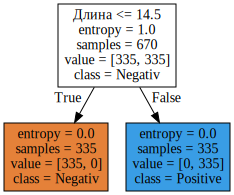

In [85]:
graph = Source(tree.export_graphviz(clf, out_file = None,
                                   feature_names = list(X),
                                   class_names = ['Negativ','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [67]:
# показаель правильных ответов 
clf.score(X_train, y_train)

1.0

In [76]:
# загружаем тренировочный датасет( убирать колонки не надо, он уже готов )
X_test = pd.read_json(r'E:\pyrhon\progectTEST\2.4.4\dataset_209691_15.txt')

In [77]:
X_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,30,36.0,1,1,0
1,32,38.4,1,1,0
2,18,21.6,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
95,11,4.4,1,1,1
96,5,2.0,1,0,1
97,7,2.8,1,0,1
98,13,5.2,1,0,1


In [78]:
# метод predict - предсказание по обученной модели 
# т.е. к обученному классификатору применяем предсказание на тестовых данных
# мы говорит классификатору - на основе обученной модели, предскажи по показателям
#Длина,Высота,Шерстист,Гавкает,Лазает по деревьям  собака это или кошка
result = clf.predict(X_test)

In [79]:
# результат - массив из кошек и собак(первая строка - собака, вторая - собака и т.д.)
result

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', '

In [83]:
#Посчитаем кол-во собак
pd.Series(result)[result =='собачка'].count()

50